# HACKATHON TASK

In [1]:
import pandas as pd
import numpy as np

In [2]:
url= "data.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [7]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [8]:
#no of 0s and 1s in "y" section ie target variable

In [9]:
df['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

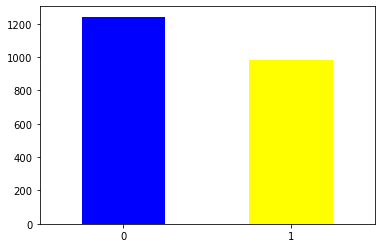

In [11]:
result = df['y'].value_counts()
result.plot(kind='bar',rot=0,color=['blue','yellow'])

In [12]:
# Discover outliers with visualization tools

<AxesSubplot:xlabel='x1'>

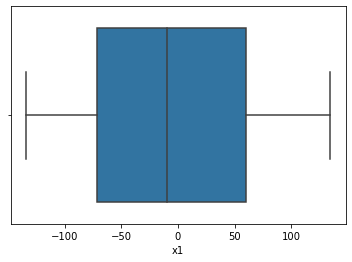

In [13]:
import seaborn as sns
sns.boxplot(x=df['x1'])

<AxesSubplot:ylabel='x2'>

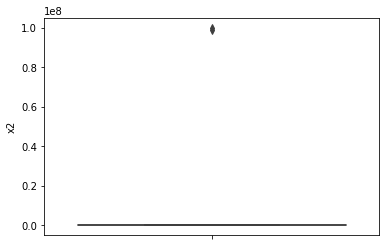

In [14]:
import seaborn as sns
sns.boxplot(y=df['x2'])

In [15]:
# Remove outliers

In [16]:
mean_value1 =df['x1'].mean()

In [17]:
df['x1'].fillna(value=mean_value1, inplace=True)

In [18]:
mean_value2 = df['x2'].mean()
df['x2'].fillna(value=mean_value2, inplace=True)

In [19]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [20]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [21]:
# thus all null values and outliers are removed

In [22]:
df.groupby('y').mean()

,x1,x2
y,,
0,3.255758,160366.477196
1,-15.000044,89.811152


## Plotting Histograms

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

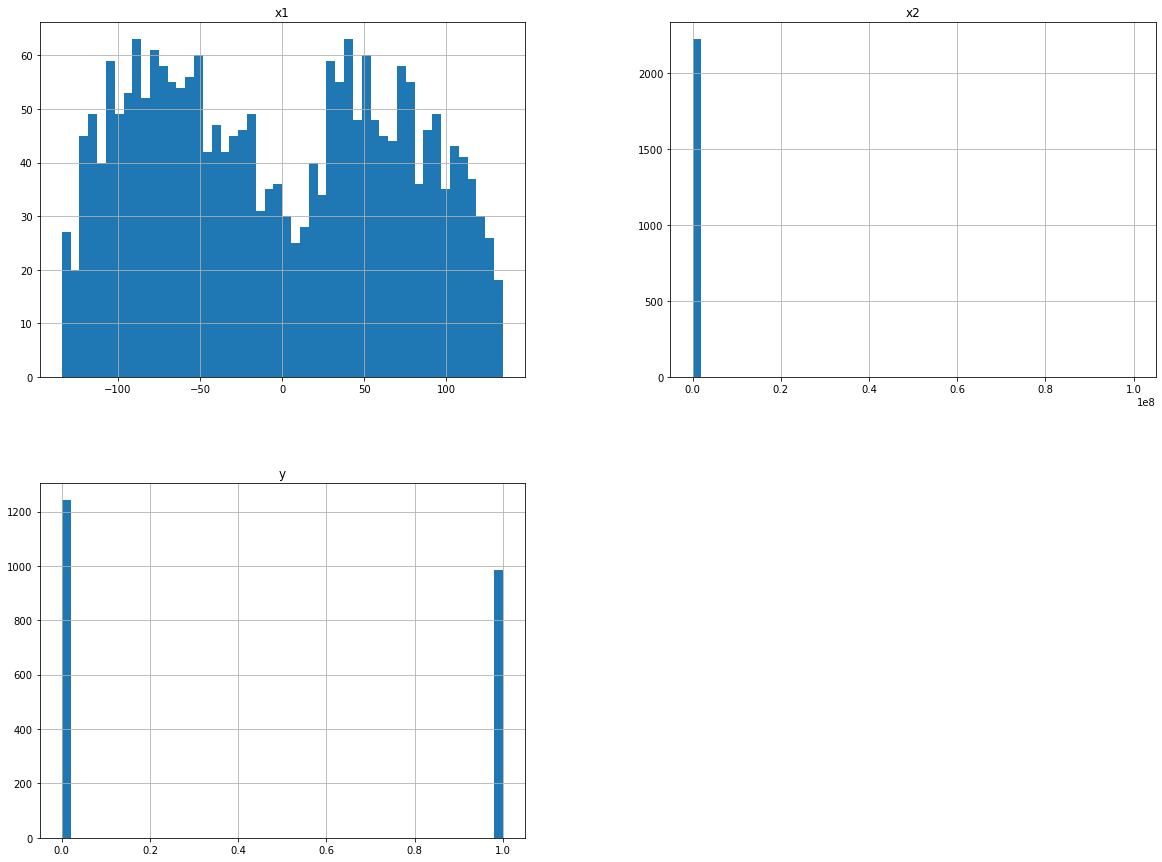

In [24]:
df.hist(bins=50,figsize=(20,15))

## Train Test Splitting

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_set,test_set = train_test_split(df,test_size=0.3,random_state=42)

In [27]:
print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)}\n")

Rows in train set:1558
 Rows in test set:669



In [28]:
train_set['y'].value_counts()

0    879
1    679
Name: y, dtype: int64

In [29]:
test_set['y'].value_counts()

0    363
1    306
Name: y, dtype: int64

In [30]:
#Class values are Equally distributed to train set and test set

In [31]:
test_set.head()

,x1,x2,y
56,-91.166642,87.748752,1
494,-107.873548,134.872654,1
1676,-107.454883,-134.302598,0
218,70.055402,-89.767910,1
744,-70.258156,73.659409,1


In [32]:
test_set.describe()

,x1,x2,y
count,669.000000,669.000000,669.000000
mean,-5.562638,126.891195,0.457399
std,75.380929,3460.543898,0.498555
min,-134.366669,-134.631502,0.000000
25%,-73.464448,-81.079426,0.000000
50%,-11.940370,-1.092302,0.000000
75%,61.633331,66.034249,1.000000
max,134.508687,89476.258941,1.000000


In [33]:
df_new = train_set.copy()

## Correlations

In [34]:
df_new.corr().T

,x1,x2,y
x1,1.000000,0.044551,-0.117617
x2,0.044551,1.000000,-0.031537
y,-0.117617,-0.031537,1.000000


In [35]:
corr_matrix = df_new.corr() # checking 'y' correlations with other independent features.

In [36]:
corr_matrix['y'].sort_values(ascending=False)

y     1.000000
x2   -0.031537
x1   -0.117617
Name: y, dtype: float64

### Splitting Features and Labels

In [37]:
df_new = train_set.drop("y",axis=1)
df_labels = train_set["y"].copy()

In [38]:
df_new.head()

,x1,x2
583,-0.134339,12.738901
771,-50.366669,46.000000
2083,-126.267136,-123.706444
888,9.503954,-52.485991
1068,40.173980,50.024147


In [39]:
df_labels.head()

583     1
771     1
2083    0
888     1
1068    0
Name: y, dtype: int64

## Selecting a desired Model for Project

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


In [41]:
logistic = LogisticRegression(tol = 0.1, solver = "lbfgs")
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
knn = KNeighborsClassifier(n_neighbors=3)
linear = svm.SVC(kernel='linear')
rbf = svm.SVC(kernel='rbf')

### Training the Logistic Regression Model with Training Data

In [42]:
logistic.fit(df_new,df_labels)

LogisticRegression(tol=0.1)

In [43]:
decision_tree.fit(df_new,df_labels)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [44]:
knn.fit(df_new,df_labels)

KNeighborsClassifier(n_neighbors=3)

In [45]:
linear.fit(df_new,df_labels)

SVC(kernel='linear')

In [46]:
rbf.fit(df_new,df_labels)

SVC()

## Model Evaluation

### Accuracy Scores

In [47]:
from sklearn.metrics import accuracy_score
df_prediction = logistic.predict(df_new)
training_data_accuracy = accuracy_score(df_prediction,df_labels)

In [48]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.5815147625160462


In [49]:
df_prediction = decision_tree.predict(df_new)
training_data_accuracy = accuracy_score(df_prediction,df_labels)

In [50]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.7618741976893453


In [51]:
df_prediction = knn.predict(df_new)
training_data_accuracy = accuracy_score(df_prediction,df_labels)

In [52]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9711168164313222


In [53]:
df_prediction = linear.predict(df_new)
training_data_accuracy = accuracy_score(df_prediction,df_labels)

In [54]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.5641848523748395


In [55]:
df_prediction = rbf.predict(df_new)
training_data_accuracy = accuracy_score(df_prediction,df_labels)

In [56]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.5641848523748395


## Hyperparameter Tuning using Grid Search

In [60]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(df_new,df_labels)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 23


In [61]:
from sklearn.model_selection import GridSearchCV
penalty = ['none', 'l2']
#C = [[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]]
class_weight = [[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]]
solver = ['lbfgs']

param_grid = dict(penalty=penalty,
                  #C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(df_new,df_labels)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Score:  0.5714008873751522
Best Params:  {'class_weight': [{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.6, 0: 0.4}, {1: 0.7, 0: 0.3}], 'penalty': 'none', 'solver': 'lbfgs'}


In [64]:
# check Classification Report

In [65]:
from sklearn.metrics import classification_report
print(classification_report(df_labels,df_prediction))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       879
           1       0.00      0.00      0.00       679

    accuracy                           0.56      1558
   macro avg       0.28      0.50      0.36      1558
weighted avg       0.32      0.56      0.41      1558



C:\Users\VishAish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VishAish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VishAish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Testing the Model on Test dataset

In [66]:
X_test = test_set.drop("y",axis=1)
Y_test = test_set["y"].copy()

In [67]:
X_test.head()

,x1,x2
56,-91.166642,87.748752
494,-107.873548,134.872654
1676,-107.454883,-134.302598
218,70.055402,-89.767910
744,-70.258156,73.659409


In [68]:
Y_test.head()

56      1
494     1
1676    0
218     1
744     1
Name: y, dtype: int64

### Testing the Model with Testing Data

In [69]:

from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_test,Y_test)

#model1.fit(X_test,Y_test)

KNeighborsClassifier(n_neighbors=3)

In [70]:
from sklearn.metrics import accuracy_score
X_test_prediction = knn1.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [71]:
print('Accuracy on training data:',testing_data_accuracy)

Accuracy on training data: 0.9745889387144993


In [72]:
from sklearn.model_selection import cross_val_predict
Y_test_prediction = cross_val_predict(knn1,X_test,Y_test,cv=3)

In [73]:
Y_test_prediction

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [74]:
# confusion matrix

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(Y_test,Y_test_prediction)

array([[346,  17],
       [ 19, 287]], dtype=int64)

In [77]:
from sklearn.metrics import precision_score , recall_score

In [78]:
precision_score(Y_test,Y_test_prediction)

0.944078947368421

In [79]:
recall_score(Y_test,Y_test_prediction)

0.9379084967320261

In [80]:
from sklearn.metrics import f1_score

In [81]:
f1_score(Y_test,Y_test_prediction)

0.940983606557377

In [82]:
#check classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_prediction))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       363
           1       0.94      0.94      0.94       306

    accuracy                           0.95       669
   macro avg       0.95      0.95      0.95       669
weighted avg       0.95      0.95      0.95       669



# Observation

#### As per my analysis I have predicted that KNN Classification Model is better than the other models used, because it has given better accuracy than other models.
Accuracy given = 97%

## Done

# (* , *)